In [40]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data=load_boston()
df=pd.DataFrame(data.data)
df['price']=data.target

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,[0, 2, 4, 5, 6, 7, 9, 10, 11, 12]],df.iloc[:,-1],test_size=0.3,random_state=10) # don't worry by seeing this we performed the model for entire dataset and found important features and then tained using imp features

In [97]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=2,n_estimators=11)
rfr.fit(X_train,y_train)
y_predict=rfr.predict(X_test)
r2_score(y_test,y_predict)

0.8860826097993793

In [69]:
imp=list(rfr.feature_importances_)
imp2=list(map(lambda x:imp.index(x),list(filter(lambda x:x>=0.005,imp)),))
imp2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# we found from important features strongly correlated are 5 and 12 only and we can find the same with pairplot as well

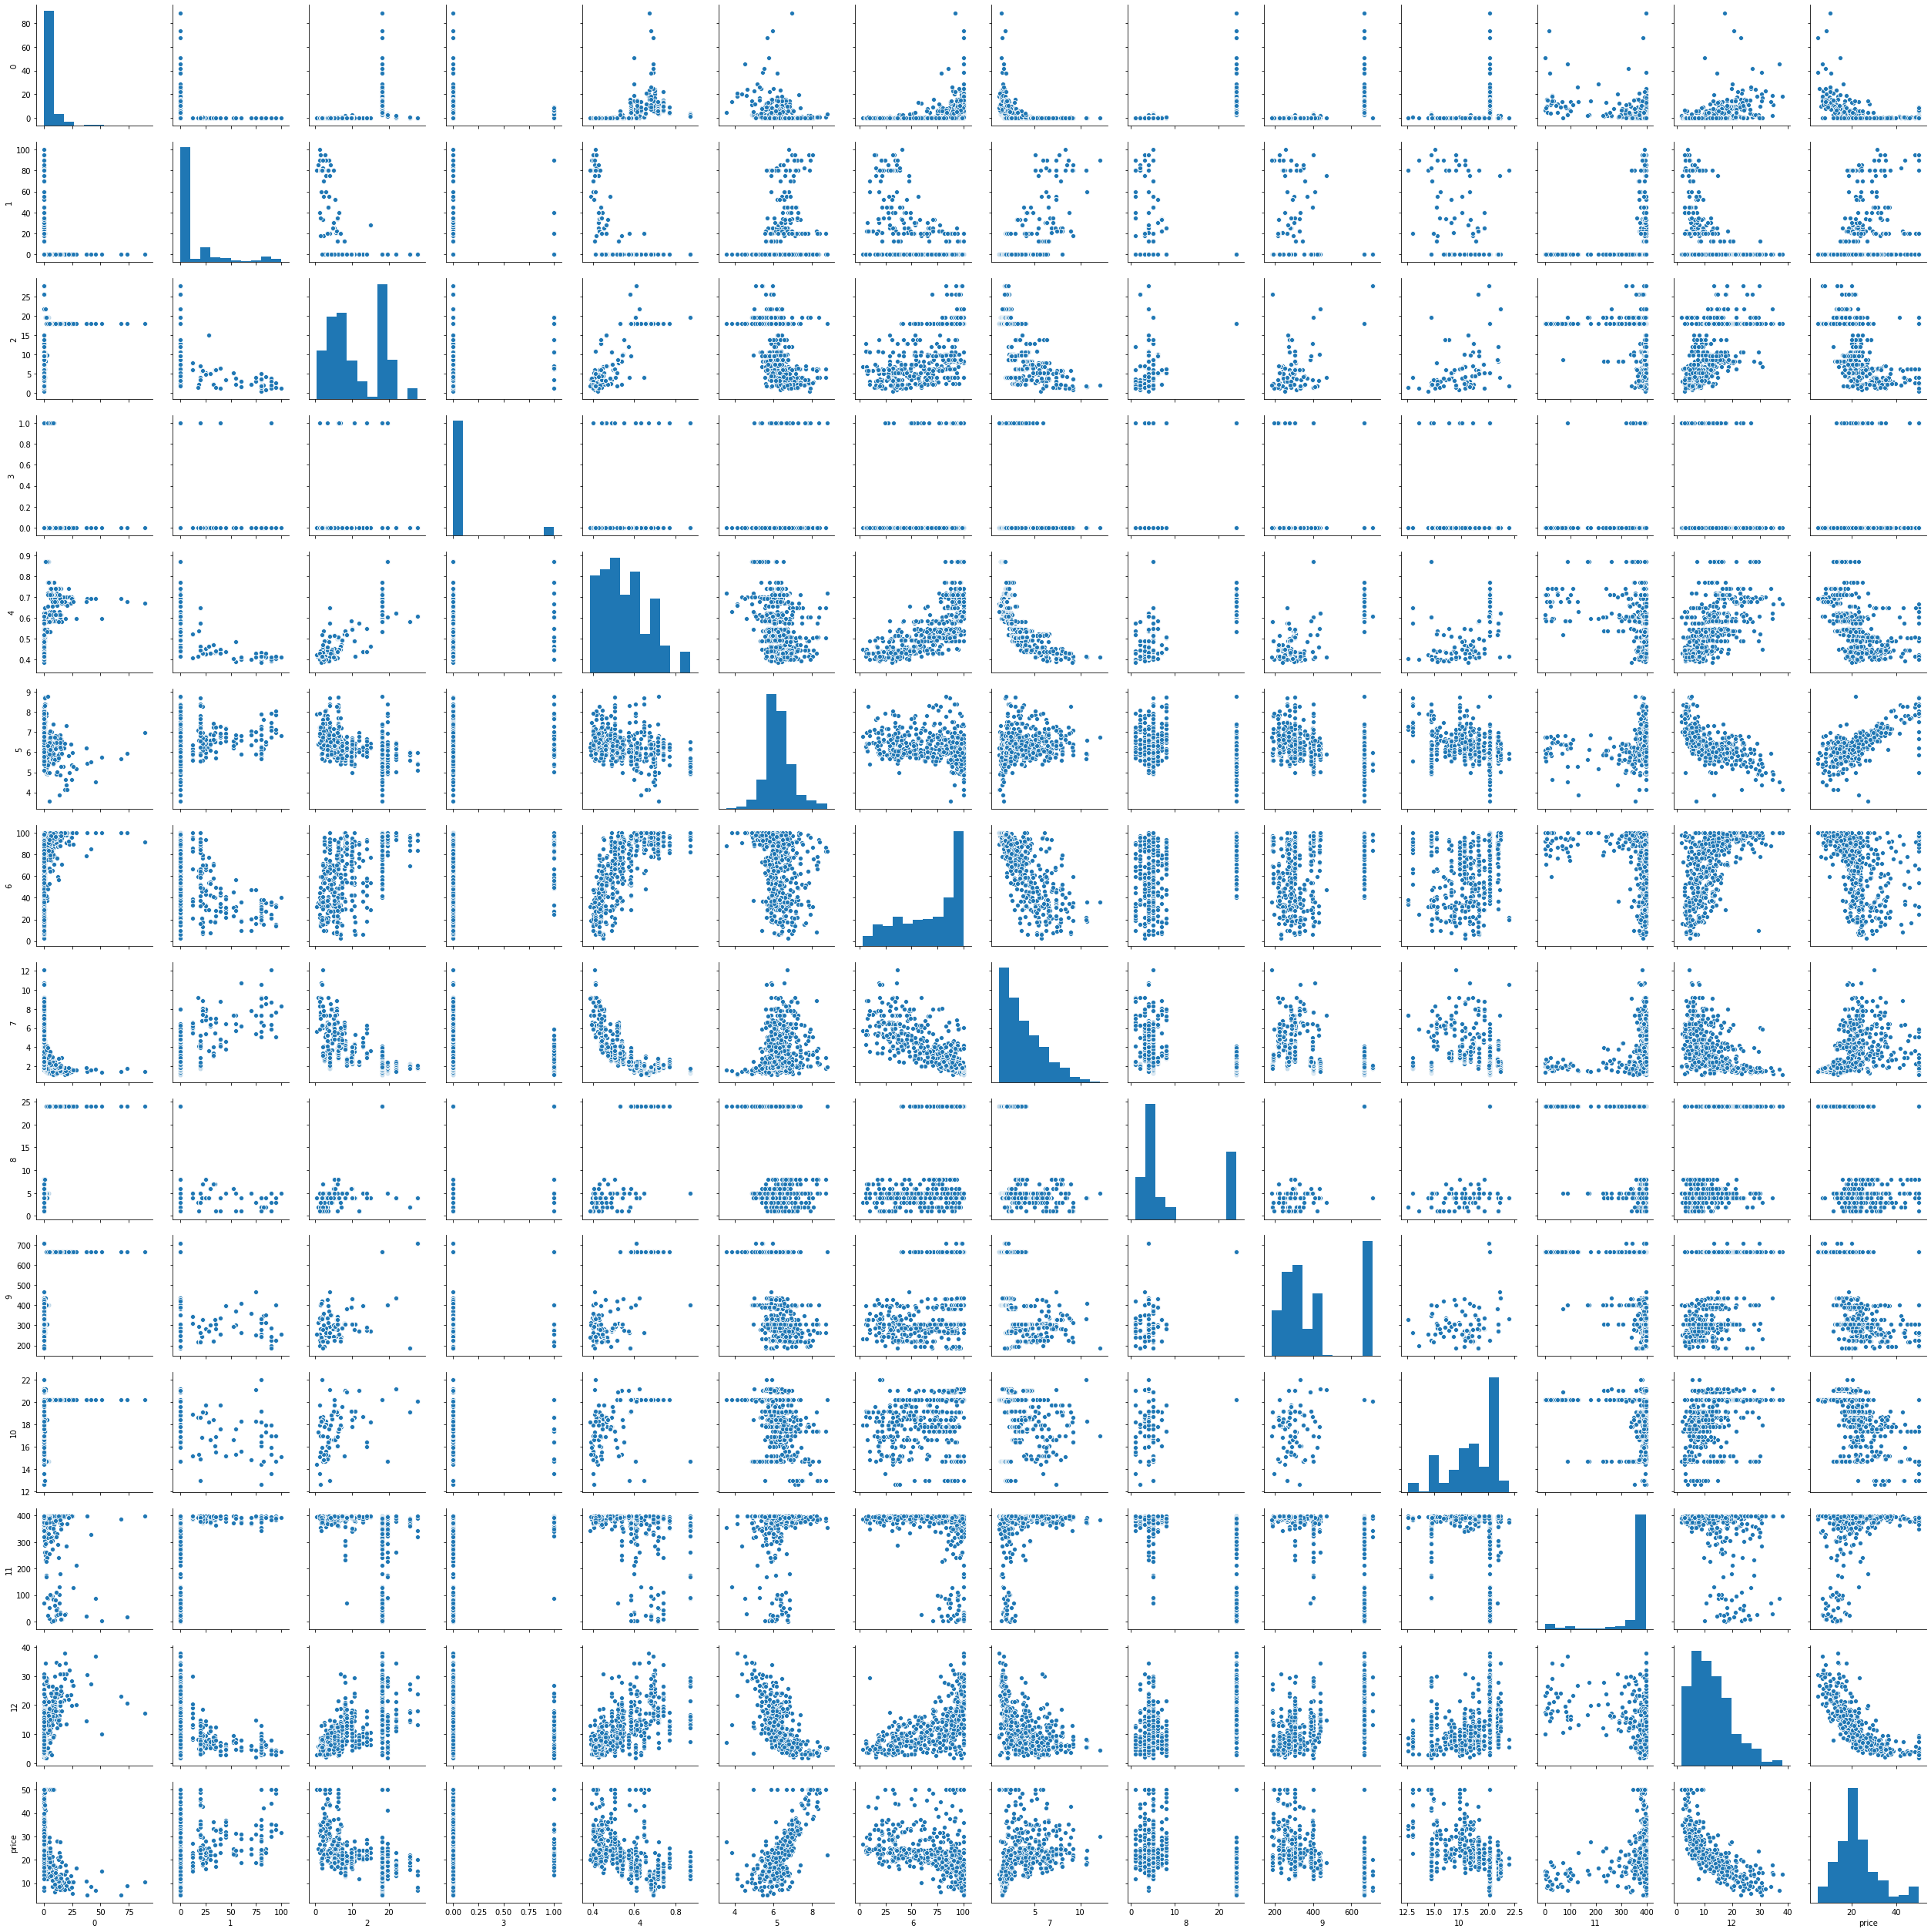

In [4]:
sns.pairplot(df)

In [11]:
df=df.iloc[:,[5,12,-1]]

In [12]:
df.head()

,5,12,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=10)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_predict=model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_predict)

0.6344109406030171

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict=rfr.predict(X_test)
r2_score(y_test,y_predict)

c:\users\sudhe\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6936072214945621

# If we remove outliers and check then we might get more no of related variables and model can become good
